In [32]:
# load packages
import LCSFinder as lcs
import numpy as np
import LCSV2 as lcs_list_typed
from processentfunctions import *
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
def timeseries_cross_entropy_PE_entropy(time_tweets_target, time_tweets_source):

    '''
    Modified version of the timeseries_cross_entropy function (removed please sanitize), to make equivalent between the original and the FastEntropy implementation.

    Function expects two inputs in the form of a list of time-tweet tuples:

    [(time, [list of symbols]),....]
    '''

    decorated_target = [ (time,"target",tweet) for time,tweet in time_tweets_target ]
    decorated_source = [ (time,"source",tweet) for time,tweet in time_tweets_source ]
        
    # Join time series:
    time_tweets = decorated_target + decorated_source

    # Sort in place by time:                                                                                                                 
    time_tweets.sort()

    # Loop over combined tweets and build word vectors and target->source relative_pos:                                                                     
    target, source, relative_pos = [], [], []
    for time,user,tweet in time_tweets:
        words = tweet
        if user == "target":
            target.extend(words)
            relative_pos.extend( [len(source)]*len(words) )
        else:                                                                                                                        
            source.extend(words)
            
    
    target = np.array(target, dtype = np.uint32)
    source = np.array(source, dtype = np.uint32)
    relative_pos = np.array(relative_pos, dtype = np.uint32)

    lambdas = np.zeros(len(target), dtype = np.uint32) # Premake for efficiency
    
    original_lambdas = get_all_lambdas_m(target, source, relative_pos, lambdas)

    return original_lambdas

In [34]:
def timeseries_cross_entropy_FE_LCS(time_tweets_target, time_tweets_source):

    '''
    ** FAST ENTROPY ***

    Modified version of the timeseries_cross_entropy function (removed please sanitize), to make equivalent between the original and the FastEntropy implementation.

    Function expects two inputs in the form of a list of time-tweet tuples:

    [(time, [list of integers]),....]
    '''

    decorated_target = [ (time,"target",tweet) for time,tweet in time_tweets_target ]
    decorated_source = [ (time,"source",tweet) for time,tweet in time_tweets_source ]
        
    # Join time series:
    time_tweets = decorated_target + decorated_source

    # Sort in place by time:                                                                                                                 
    time_tweets.sort()

    # Loop over combined tweets and build word vectors and target->source relative_pos:                                                                     
    target, source, relative_pos = [], [], []
    for time,user,tweet in time_tweets:
        words = tweet
        if user == "target":
            target.extend(words)
            relative_pos.extend( [len(source)]*len(words) )
        else:                                                                                                                        
            source.extend(words)
            
    target = np.array(target, dtype = np.uint32)
    source = np.array(source, dtype = np.uint32)
    relative_pos = np.array(relative_pos, dtype = np.uint32)

    # set up objects
    source = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in source])])
    target = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in target])])

    ob = lcs.LCSFinder(target,source) # s1 and then s2

    l_t =  lcs.Vector2D(tuple((i,int(relative_pos[i])) for i in range(len(relative_pos))))
    
    fastentropy_lambdas = np.array([x+1 for x in ob.ComputeAllLCSs(l_t)])

    return fastentropy_lambdas

In [42]:
def timeseries_cross_entropy_FE_Cython(time_tweets_target, time_tweets_source):

    '''
    ** FAST ENTROPY ***

    Modified version of the timeseries_cross_entropy function (removed please sanitize), to make equivalent between the original and the FastEntropy implementation.

    Function expects two inputs in the form of a list of time-tweet tuples:

    [(time, [list of integers]),....]
    '''

    decorated_target = [ (time,"target",tweet) for time,tweet in time_tweets_target ]
    decorated_source = [ (time,"source",tweet) for time,tweet in time_tweets_source ]
        
    # Join time series:
    time_tweets = decorated_target + decorated_source

    # Sort in place by time:                                                                                                                 
    time_tweets.sort()

    # Loop over combined tweets and build word vectors and target->source relative_pos:                                                                     
    target, source, relative_pos = [], [], []
    for time,user,tweet in time_tweets:
        words = tweet
        if user == "target":
            target.extend(words)
            relative_pos.extend( [len(source)]*len(words) )
        else:                                                                                                                        
            source.extend(words)
        
    ob_ty = lcs_list_typed.LCSFinder(target, source) # s1 and then s2

    l_t =  [(i,i) for i in range(len(relative_pos))]
    # print(l_t)
    
    cython_lambdas = np.array([x+1 for x in ob_ty.ComputeAllLCSs(l_t)])

    return cython_lambdas

In [38]:
N_s = 10
N_t = 10
V = 5
tweet_size = 1

list_source = np.array([1, 1, 3, 0, 4, 1, 4, 4, 2, 1])
list_target = np.array([0, 1, 0, 1, 3, 2, 1, 4, 0, 0])

times_s = np.arange(N_s)+0.5 #np.sort(2*np.random.rand(N_s) + 0.2*np.arange(N_s))
times_t = np.arange(N_s) #np.sort(2*np.random.rand(N_t) + 0.2*np.arange(N_t))


time_tweets_target = [(times_t[i],list(list_target[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_t)]
time_tweets_source = [(times_s[i],list(list_source[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_s)]

In [39]:
timeseries_cross_entropy_PE_entropy(time_tweets_target, time_tweets_source)

array([1, 2, 1, 3, 2, 1, 2, 2, 2, 2], dtype=uint32)

In [40]:
timeseries_cross_entropy_FE_LCS(time_tweets_target, time_tweets_source) 

array([1, 2, 1, 3, 2, 1, 2, 2, 2, 2])

In [29]:
np.array([0, 1, 0, 2, 1, 0, 2, 1, 1, 1])+1

array([1, 2, 1, 3, 2, 1, 3, 2, 2, 2])

In [43]:
timeseries_cross_entropy_FE_Cython(time_tweets_target, time_tweets_source) #### HAS OVERLAPS

array([1, 2, 1, 3, 2, 1, 3, 2, 2, 2])

In [10]:
timeseries_cross_entropy_FE_Cython(time_tweets_target, time_tweets_source) == timeseries_cross_entropy_FE_LCS(time_tweets_target, time_tweets_source) 

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]


array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True])

In [20]:
# initialise strings

list_source = np.array([1, 1, 3, 0, 4, 1, 4, 4, 2, 1])
list_target = np.array([0, 1, 0, 1, 3, 2, 1, 4, 0, 0])


# set up objects
source = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in list_source])])
target = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in list_target])])
ob = lcs.LCSFinder(target, source) # s1 and then s2

# s1 = source
# s2 = target

# set up indices to search from
l_t =  lcs.Vector2D(tuple((i,i) for i in range(len(list_source))))

m_len = ob.ComputeAllLCSs(l_t)

search = tuple((i,i+1) for i in range(len(list_source)))
print(f'So we are comparing')
[print(f'source {x[0]} to n, {list_source[x[0]:]} is compared to target to {x[1]}, {list_target[:x[1]]}') for x in search]

print(f'match lengths of {m_len}')

# which gives the same as the new code

So we are comparing
source 0 to n, [1 1 3 0 4 1 4 4 2 1] is compared to target to 1, [0]
source 1 to n, [1 3 0 4 1 4 4 2 1] is compared to target to 2, [0 1]
source 2 to n, [3 0 4 1 4 4 2 1] is compared to target to 3, [0 1 0]
source 3 to n, [0 4 1 4 4 2 1] is compared to target to 4, [0 1 0 1]
source 4 to n, [4 1 4 4 2 1] is compared to target to 5, [0 1 0 1 3]
source 5 to n, [1 4 4 2 1] is compared to target to 6, [0 1 0 1 3 2]
source 6 to n, [4 4 2 1] is compared to target to 7, [0 1 0 1 3 2 1]
source 7 to n, [4 2 1] is compared to target to 8, [0 1 0 1 3 2 1 4]
source 8 to n, [2 1] is compared to target to 9, [0 1 0 1 3 2 1 4 0]
source 9 to n, [1] is compared to target to 10, [0 1 0 1 3 2 1 4 0 0]
match lengths of (0, 1, 0, 2, 1, 0, 1, 1, 1, 1)


In [23]:
np.array(m_len)+1 == np.array([1, 2, 1, 2, 1, 2, 1, 2, 3, 2]) # agrees with LCS.py

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# debugging

In [7]:
s1 = [1, 1, 3, 0, 4, 1, 4, 4, 2, 1]
s2 = [0, 1, 0, 1, 3, 2, 1, 4, 0, 0]

In [6]:
# Define two sequences
s1 = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in s1])])
s2 = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in s2])])
# Create an instance of the LCSFinder class
lcs_finder = lcs.LCSFinder(s1, s2)
lcs_finder.GetSA()


(10, 20, 19, 11, 13, 3, 9, 12, 0, 1, 14, 17, 5, 8, 16, 2, 15, 18, 4, 7, 6)

In [10]:
lcs_list_typed.LCSFinder(s1,s2).GetSA()

[10, 20, 19, 11, 13, 3, 9, 12, 0, 1, 14, 17, 5, 8, 16, 2, 15, 18, 4, 7, 6]

# timings

In [48]:
# Look at run times for increasing N
### Process for randomly generating sequences
V = 2
res = []
N_iter = 20
times_pe = []
times_fe = []
times_fet = []
tweet_size = 10
N_x = []

for N in range(1,2002,200):

    N_s = N
    N_t = N

    for _ in range(N_iter):
        N_x.append(tweet_size*N)
        list_source = np.random.randint(0,V,tweet_size*N_s)
        list_target = np.random.randint(0,V,tweet_size*N_s)

        times_s = np.sort(2*np.random.rand(N_s) + 0.2*np.arange(N_s))
        times_t = np.sort(2*np.random.rand(N_t) + 0.2*np.arange(N_t))


        time_tweets_target = [(times_t[i],list(list_target[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_t)]
        time_tweets_source = [(times_s[i],list(list_source[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_s)]


        nowpe = datetime.datetime.now()
        lambdas_pe = timeseries_cross_entropy_PE_entropy(time_tweets_target, time_tweets_source)
        thenpe = datetime.datetime.now()

        nowfe = datetime.datetime.now()
        lambdas_fe = timeseries_cross_entropy_FE_LCS(time_tweets_target, time_tweets_source)
        thenfe = datetime.datetime.now()

        nowfet = datetime.datetime.now()
        lambdas_fet = timeseries_cross_entropy_FE_Cython(time_tweets_target, time_tweets_source)
        thenfet = datetime.datetime.now()

        times_pe.append((thenpe-nowpe).total_seconds())
        times_fe.append((thenfe-nowfe).total_seconds())
        times_fet.append((thenfet-nowfet).total_seconds())

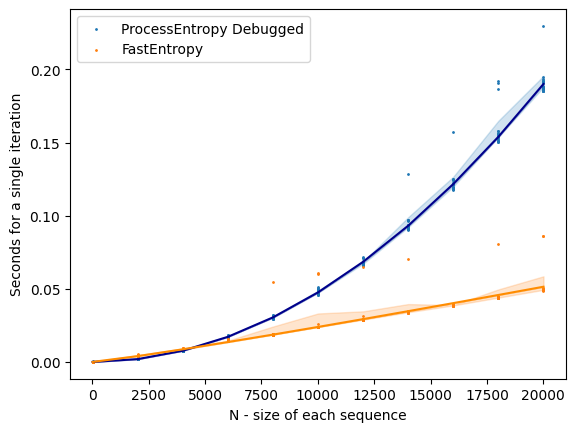

In [50]:
N_x = np.array(N_x)
plt.scatter(N_x,times_pe, label = 'ProcessEntropy Debugged', s=1)
sns.lineplot(x=N_x, y=times_pe, linewidth=0)
sns.lineplot(x=N_x, y=0.76/(1601600400)*N_x**2, c='darkblue')
plt.scatter(N_x,times_fe, label = 'FastEntropy',s=1)
sns.lineplot(x=N_x, y=times_fe, linewidth=0)
sns.lineplot(x=N_x, y = 0.11/4.24097327e+05*N_x*np.log(N_x), c='darkorange')
# plt.scatter(N_x,times_fet, label = 'Typed Cython',s=1)
# sns.lineplot(x=N_x, y=times_fet, linewidth=0)
# sns.lineplot(x=N_x, y = 0.8/4.24097327e+05*N_x*np.log(N_x), c='darkgreen')
plt.xlabel('N - size of each sequence')
plt.ylabel('Seconds for a single iteration')
plt.legend()
plt.savefig('speedtriocomparison.pdf')